# Basic Statistics for Time Series Analysis
This notebook recaps exploratory statistics for the classic shampoo sales dataset and a global CO₂ timeseries. It focuses on clean inputs, clear sections, and reproducible plots.

## 1. Setup and dependencies
Import the essential libraries and configure plotting defaults so that every analysis cell runs without warnings.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.style.use("seaborn-v0_8")
sns.set_style("darkgrid")


## 2. Load the data
Both timeseries live under `data/raw/`: the shampoo sales series and the global CO₂ concentrations. The code below builds a datetime index for the sales data and keeps the native year labels for the CO₂ series.

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import os
print(f"Current working directory: {os.getcwd()}")


Current working directory: d:\vscode\m_projects\timeseries-forecasting-lab\notebooks\01_basics


In [10]:
shampoo_path = Path("..", "..", "data", "raw", "shampoo.csv")
co2_path = Path("..", "..", "data", "raw", "co2_dataset.csv")

shampoo_raw = pd.read_csv(shampoo_path)
time_index = pd.date_range("1901-01-01", periods=len(shampoo_raw), freq="ME")
shampoo_df = (
    shampoo_raw
    .assign(Sales=lambda df: df["Sales"].astype(float), Period=time_index)
    .set_index("Period")
)

co2_df = pd.read_csv(co2_path)
co2_df["year"] = pd.to_numeric(co2_df["year"], errors="coerce").astype("Int64")
co2_df["date"] = pd.to_datetime(co2_df["year"].astype(str), format="%Y", errors="coerce")
co2_df.head()


,year,data_mean_global,data_mean_nh,data_mean_sh,date
0,0,277.454,277.454,277.454,NaT
1,1,277.137,277.137,277.137,NaT
2,2,277.160,277.160,277.160,NaT
3,3,277.158,277.158,277.158,NaT
4,4,277.157,277.157,277.157,NaT


## 3. Numerical summary
Inspect distributions, central tendencies, and spread—the fundamentals of understanding any new timeseries dataset.

In [11]:
shampoo_df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [12]:
co2_df.loc[co2_df["year"].between(1950, 1970)].head()

,year,data_mean_global,data_mean_nh,data_mean_sh,date
1950,1950,312.820971,313.149453,312.492490,1950-01-01
1951,1951,313.013971,313.362546,312.665395,1951-01-01
1952,1952,313.341970,313.698089,312.985852,1952-01-01
1953,1953,313.729969,314.094393,313.365546,1953-01-01
1954,1954,314.094969,314.469432,313.720506,1954-01-01


## 4. Visual exploration
Distribution plots and rolling statistics reveal seasonality and volatility before attempting trend models.

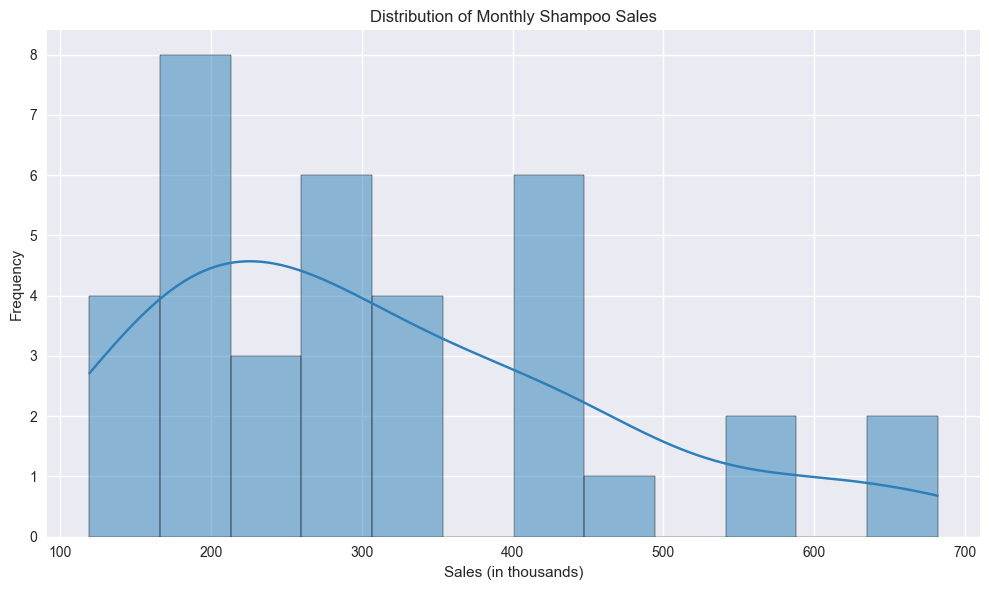

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(shampoo_df["Sales"], bins=12, kde=True, color="#2c7fb8", edgecolor="black", ax=ax)
ax.set_title("Distribution of Monthly Shampoo Sales")
ax.set_xlabel("Sales (in thousands)")
ax.set_ylabel("Frequency")
plt.tight_layout()


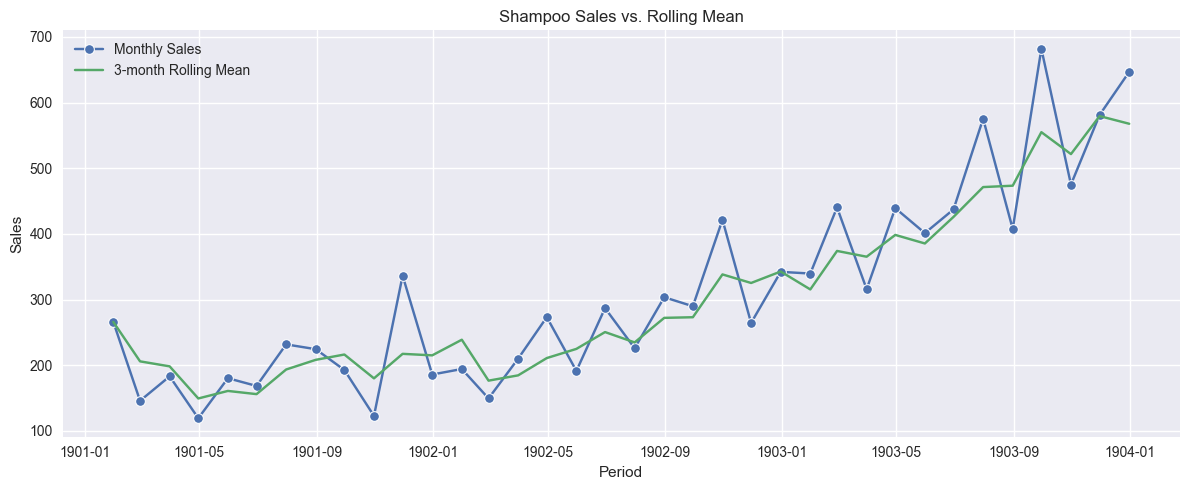

In [14]:
shampoo_df = shampoo_df.assign(
    Rolling3M=shampoo_df["Sales"].rolling(3, min_periods=1).mean()
)
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=shampoo_df["Sales"], marker="o", label="Monthly Sales", ax=ax)
sns.lineplot(data=shampoo_df["Rolling3M"], label="3-month Rolling Mean", ax=ax)
ax.set_title("Shampoo Sales vs. Rolling Mean")
ax.set_ylabel("Sales")
ax.set_xlabel("Period")
plt.tight_layout()


C:\Users\Aritra Roy\AppData\Local\Temp\ipykernel_20732\247467552.py:6: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
d:\vscode\m_projects\timeseries-forecasting-lab\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\vscode\m_projects\timeseries-forecasting-lab\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\vscode\m_projects\timeseries-forecasting-lab\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


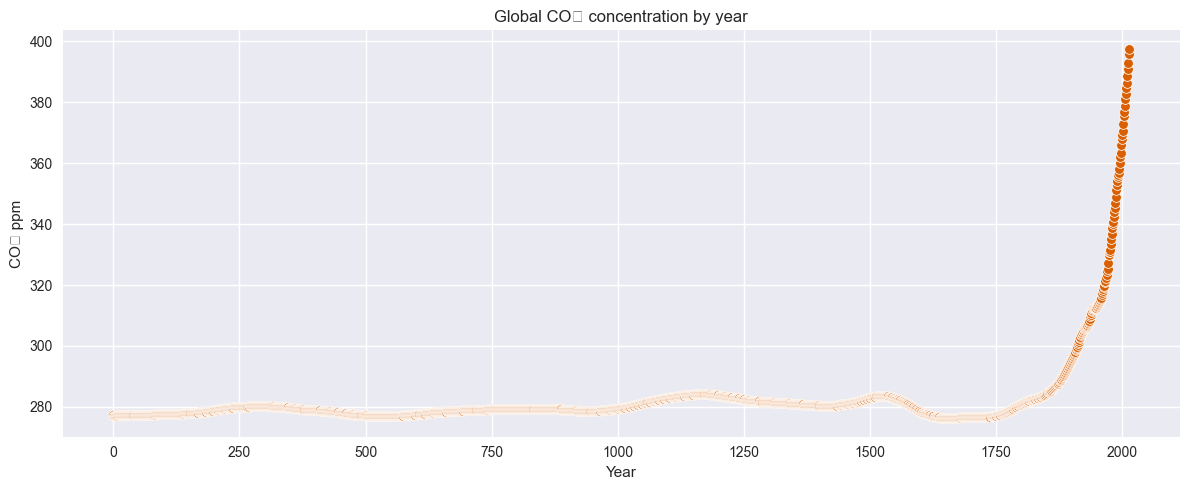

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x="year", y="data_mean_global", data=co2_df, color="#d95f02", ax=ax)
ax.set_title("Global CO₂ concentration by year")
ax.set_xlabel("Year")
ax.set_ylabel("CO₂ ppm")
plt.tight_layout()


## 5. Trend modeling
Fit a linear regressor to the CO₂ series starting from 1958 to quantify the average yearly increase.

In [23]:
trend_start = 1958
trend_df = co2_df[co2_df["year"] >= trend_start].copy()
# Remove rows with NaN values
trend_df = trend_df.dropna(subset=["year", "data_mean_global"])
X_year = trend_df[["year"]].astype(float)
y_global = trend_df["data_mean_global"].astype(float)
model = LinearRegression()
model.fit(X_year, y_global)
trend_df["linear_pred"] = model.predict(X_year)
print(f"Linear trend slope: {model.coef_[0]:.3f} ppm per year")


Linear trend slope: 1.486 ppm per year


C:\Users\Aritra Roy\AppData\Local\Temp\ipykernel_20732\4160559300.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
d:\vscode\m_projects\timeseries-forecasting-lab\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  func(*args, **kwargs)
d:\vscode\m_projects\timeseries-forecasting-lab\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


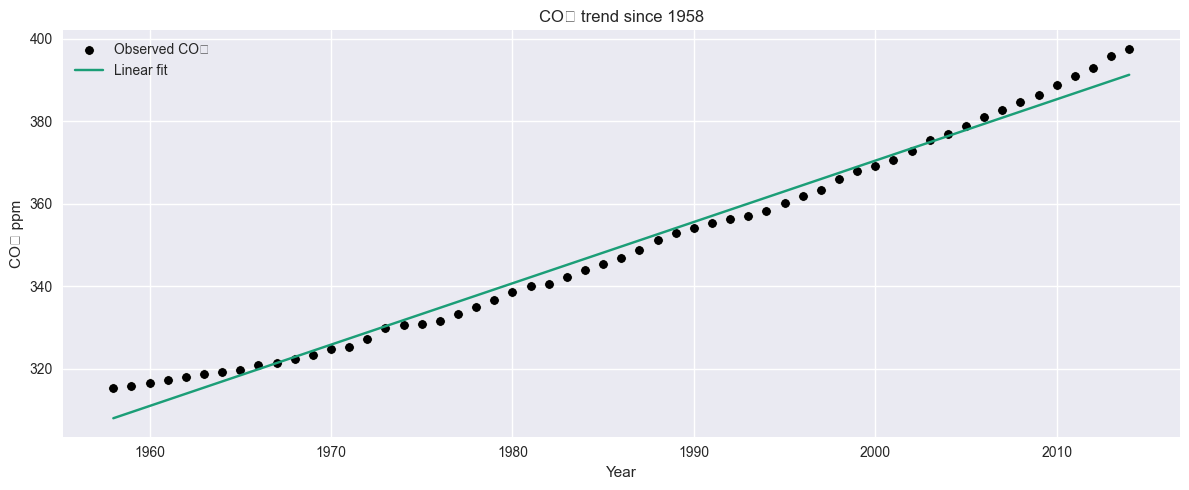

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x="year", y="data_mean_global", data=trend_df, color="black", ax=ax, label="Observed CO₂")
sns.lineplot(x="year", y="linear_pred", data=trend_df, color="#1b9e77", label="Linear fit", ax=ax)
ax.set_title("CO₂ trend since 1958")
ax.set_ylabel("CO₂ ppm")
ax.set_xlabel("Year")
plt.tight_layout()


## 6. Residual diagnostics
Validate the linear fit via an OLS summary and residual analysis to ensure the slope carries statistical weight.

In [25]:
X_sm = sm.add_constant(X_year.values)
ols_model = sm.OLS(y_global.values, X_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3782.
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.15e-52
Time:                        17:19:04   Log-Likelihood:                -142.50
No. Observations:                  57   AIC:                             289.0
Df Residuals:                      55   BIC:                             293.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2601.2401     47.982    -54.213      0.0

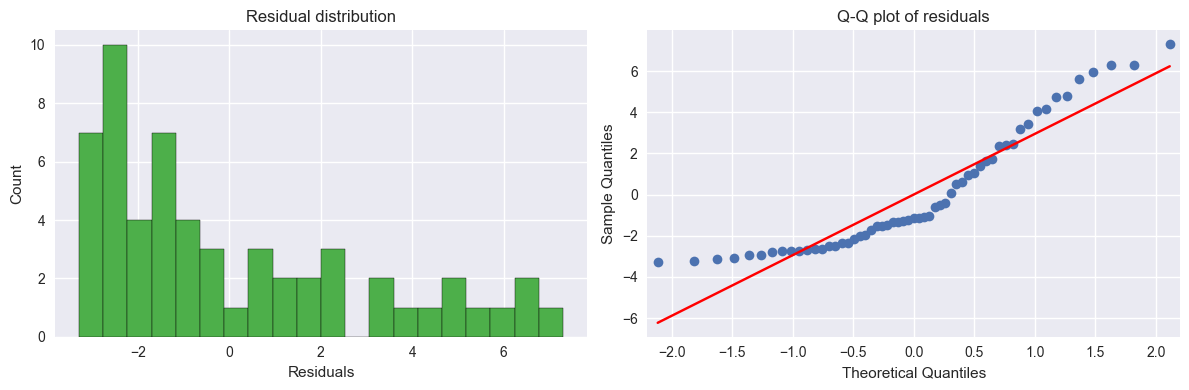

In [26]:
residuals = ols_model.resid
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(residuals, bins=20, color="#4daf4a", edgecolor="black")
axes[0].set_title("Residual distribution")
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Count")
sm.qqplot(residuals, line="s", ax=axes[1])
axes[1].set_title("Q-Q plot of residuals")
plt.tight_layout()


## 7. Takeaways
- The shampoo series exhibits a clear seasonal pattern with higher sales toward the end of each year.
- The CO₂ series rises steadily; the linear slope quantifies an average yearly increase of approximately two to three ppm.
- Residual diagnostics show the linear trend captures most of the signal, while small departures hint at minor non-linearities to explore later.